<a href="https://colab.research.google.com/github/preethamnagesh8/captcha_recognition/blob/main/security_analytics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [22]:
path1 = '/home/samples/23n88.png'
path2 = '/home/samples/23mdg.png'

In [23]:
def plot_ (img1, img2) :
    plt.figure(figsize = (20,5))
    
    plt.subplot(1,2,1)
    plt.imshow(img1, 'gray')
    
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(img2, 'gray')
    
    plt.axis('off')

In [24]:
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)

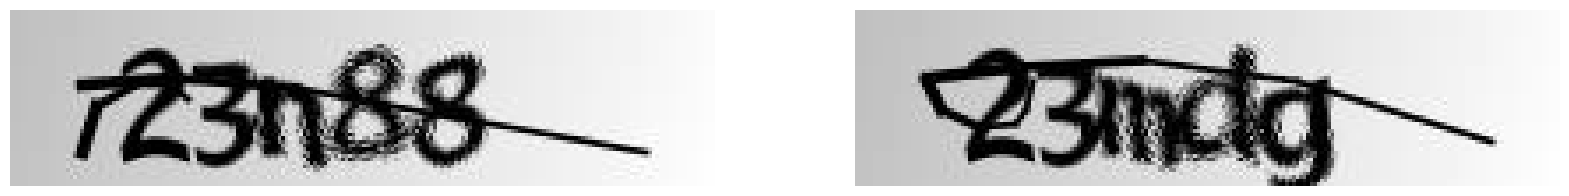

In [25]:
plot_(img1, img2)

In [26]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

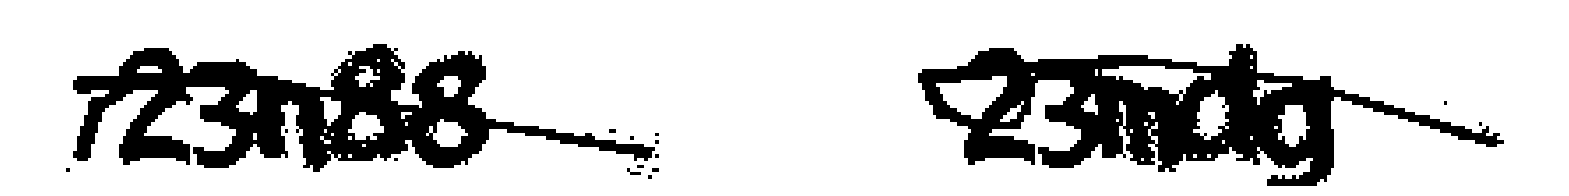

In [27]:
plot_(thresh_img1, thresh_img2)

In [28]:
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
close_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

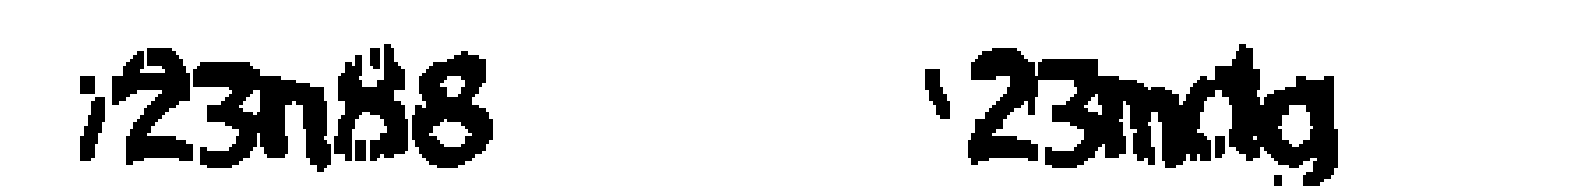

In [29]:
plot_(close_img1, close_img2)

In [30]:
dilate_img1 = cv2.dilate(close_img1, np.ones((2,2), np.uint8), iterations = 1)
dilate_img2 = cv2.dilate(close_img2, np.ones((2,2), np.uint8), iterations = 1)

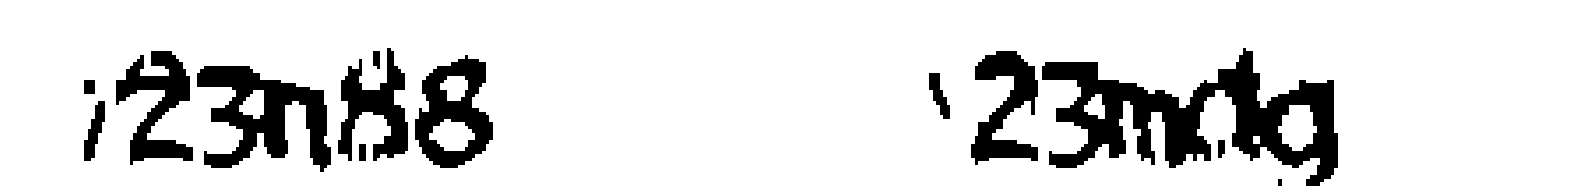

In [31]:
plot_(dilate_img1, dilate_img2)

In [32]:
gauss_img1 = cv2.GaussianBlur(dilate_img1, (1,1), 0)
gauss_img2 = cv2.GaussianBlur(dilate_img2, (1,1), 0)

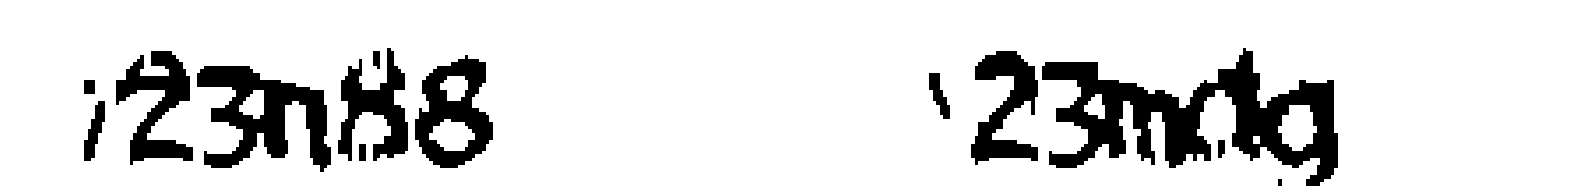

In [33]:
plot_(gauss_img1, gauss_img2)

In [34]:
cv2.rectangle(gauss_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img1, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)

cv2.rectangle(gauss_img2, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img2, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img2, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img2, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img2, (110,12),(130,49),0, 1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

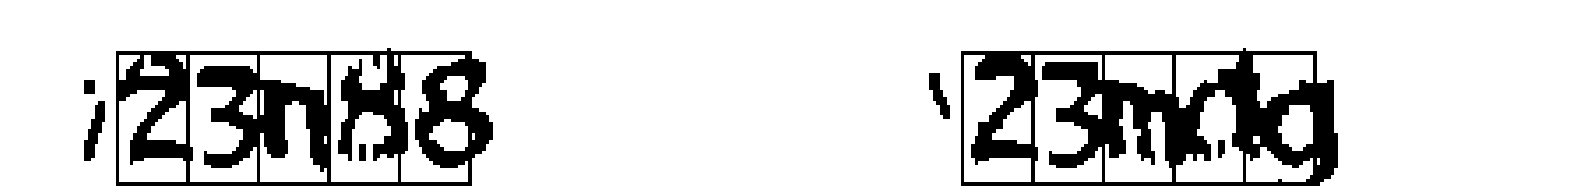

In [35]:
plot_(gauss_img1, gauss_img2)

In [36]:
path = '/home/samples/'

In [37]:
def t_img (img) :
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

def c_img (img) :
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

def d_img (img) :
    return cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)

def b_img (img) :
    return cv2.GaussianBlur(img, (1,1), 0)

In [38]:
import os
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array

In [39]:
X = []
y = []

for image in os.listdir(path) :
    
    if image[6:] != 'png' :
        continue
    
    img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))
        y.append(image[i])
X = np.array(X)
y = np.array(y)

In [40]:
print(X.shape)
print(y.shape)

(5200, 40, 20, 1)
(5200,)


In [41]:
X /= 255.0

[]

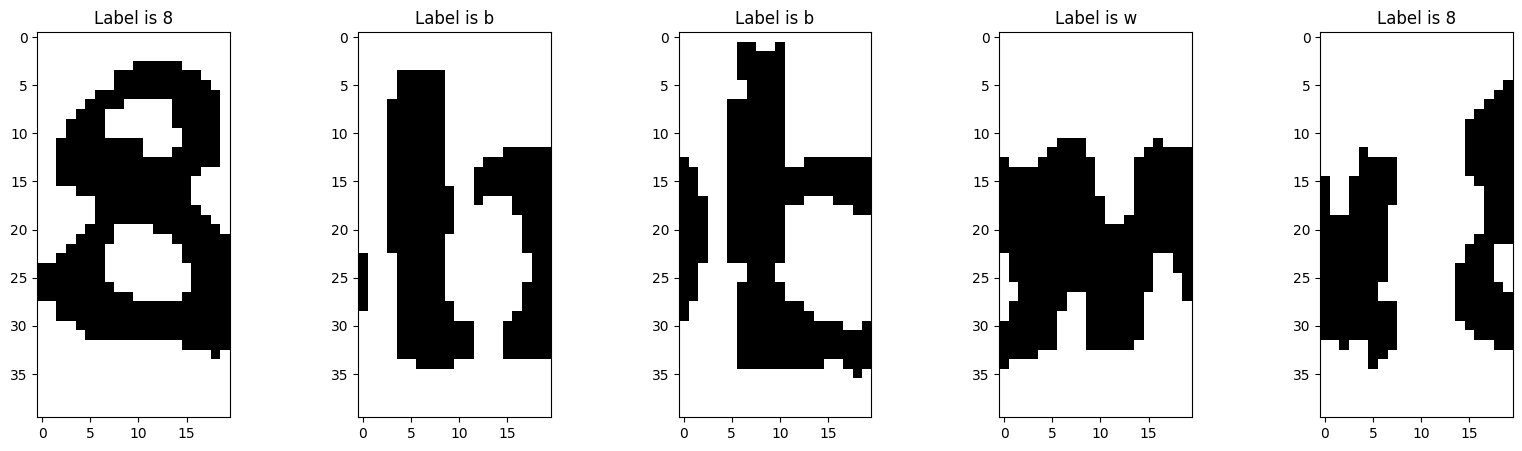

In [42]:
plt.figure(figsize = (20,5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()

In [43]:
temp = set(y)
for t in temp :
    print('Occurance count of ' + t + ' : ' + str(len(y[y == t])))

Occurance count of 5 : 281
Occurance count of 4 : 284
Occurance count of b : 240
Occurance count of 6 : 259
Occurance count of c : 262
Occurance count of 8 : 264
Occurance count of g : 271
Occurance count of y : 232
Occurance count of w : 235
Occurance count of 7 : 258
Occurance count of n : 525
Occurance count of p : 253
Occurance count of x : 264
Occurance count of e : 235
Occurance count of m : 275
Occurance count of 2 : 265
Occurance count of f : 271
Occurance count of d : 259
Occurance count of 3 : 267


In [44]:
 temp_df = pandas.DataFrame({'labels' : [t for t in temp], 'Count' : [len(y[y==t]) for t in temp]})

Text(0.5, 1.0, 'Label distribution in CAPTCHAS')

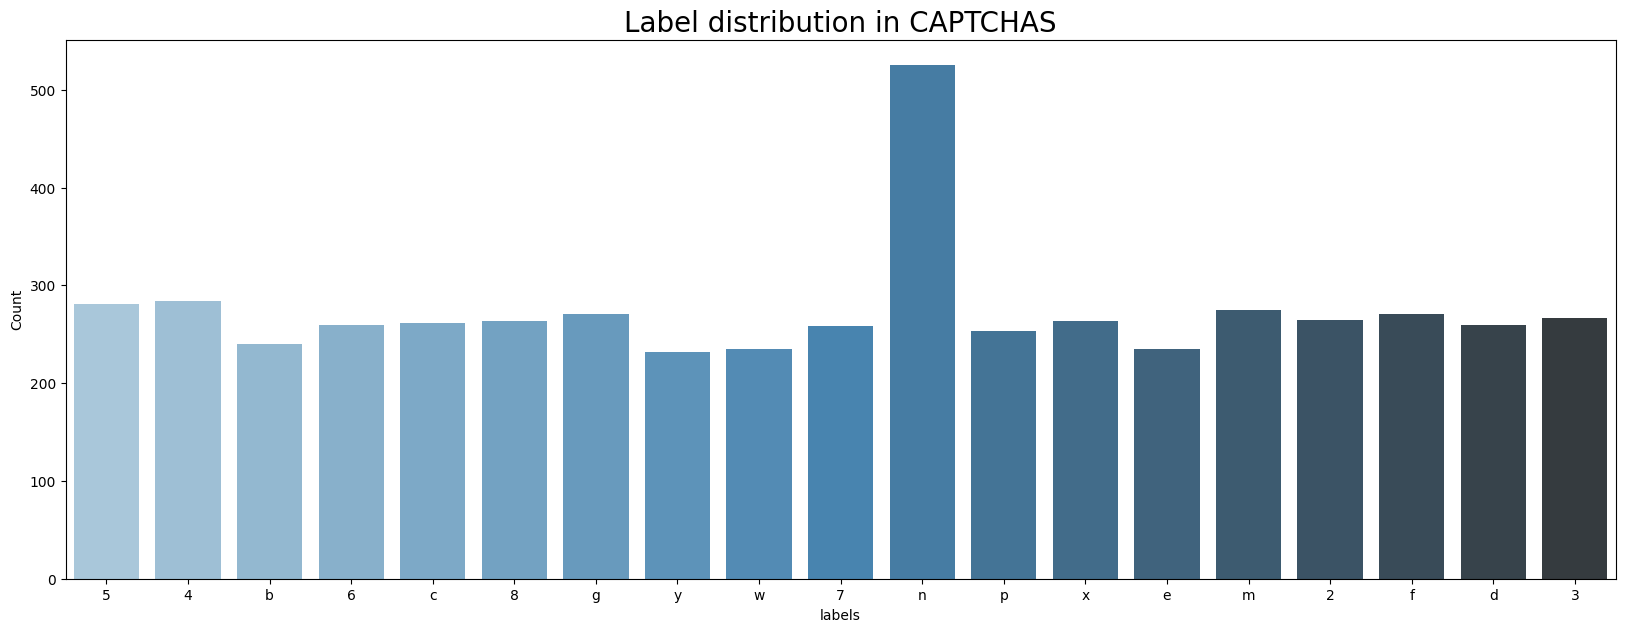

In [45]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in CAPTCHAS', fontsize = 20)

In [46]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y_combine = LabelEncoder().fit_transform(y)
y_one_hot = OneHotEncoder(sparse = False).fit_transform(y_combine.reshape(len(y_combine),1))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
print('letter n : ' + str(y[1]))
print('label : ' + str(y_combine[1]))
print('Count : ' + str(len(y_combine[y_combine == y_combine[1]])))

letter n : b
label : 7
Count : 240


In [48]:
info = {y_combine[i] : y[i] for i in range(len(y))}

In [49]:
print(X.shape)
print(y_one_hot.shape)  # one hot encoded form

(5200, 40, 20, 1)
(5200, 19)


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 1)

In [52]:
y_temp = np.argmax(y_test, axis = 1)

In [53]:
temp = set(y_temp)
temp_df = pandas.DataFrame({'labels' : [info[t] for t in temp], 'Count' : [len(y_temp[y_temp == t]) for t in temp]})

Text(0.5, 1.0, 'Label distribution in test set')

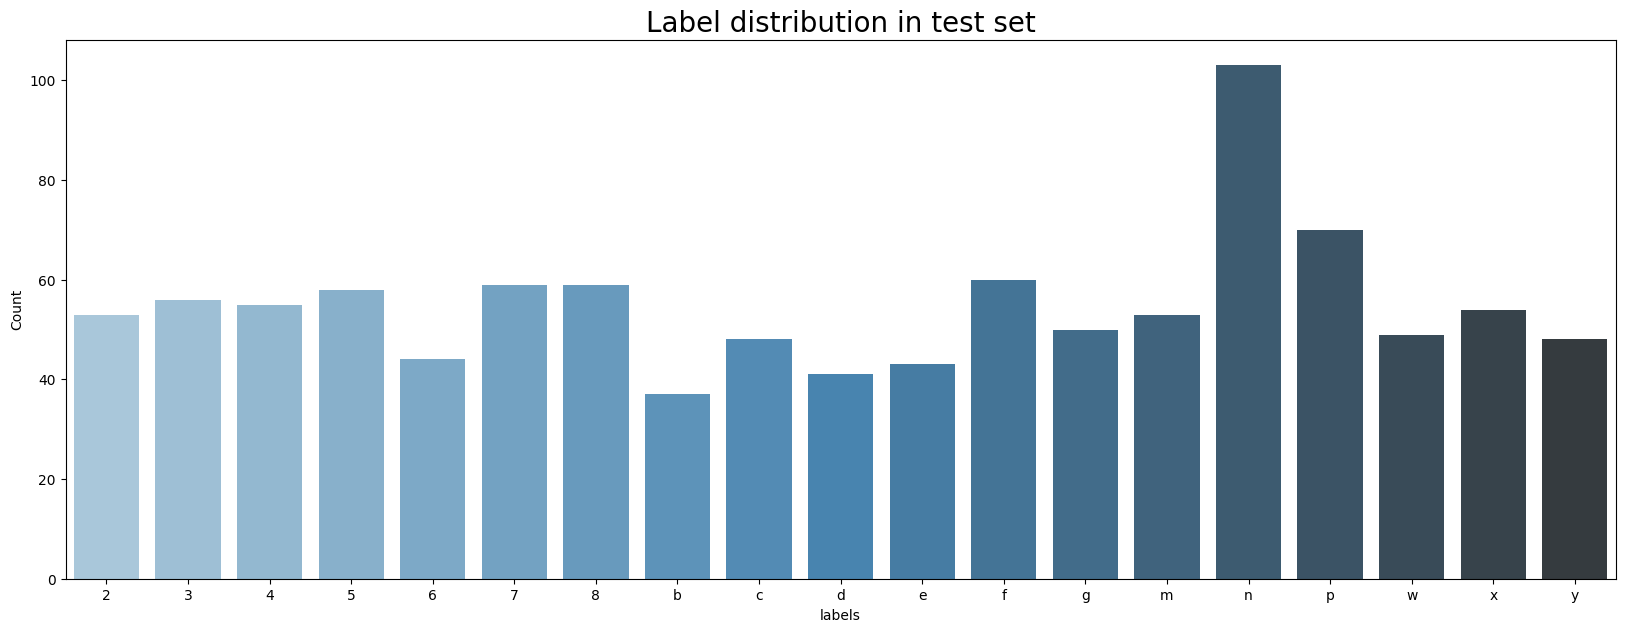

In [54]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in test set', fontsize = 20)

In [55]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization

from keras.layers import Dropout
from keras.layers import Input

In [56]:
print(X_train.shape)
print(y_train.shape)

(4160, 40, 20, 1)
(4160, 19)


In [57]:
print(X_test.shape)
print(y_test.shape)

(1040, 40, 20, 1)
(1040, 19)


In [58]:
def conv_layer (filterx) :
    
    model = Sequential()
    
    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    
    return model

In [59]:
def dens_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Dense(hiddenx, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

In [60]:
def cnn (filter1, filter2, filter3, hidden1, hidden2) :
    
    model = Sequential()
    model.add(Input((40, 20, 1,)))
    
    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))
    
    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))
    
    model.add(Dense(19, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [61]:
X_train = np.reshape(X_train, (4160, 40*20*1))

In [62]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1).fit_resample(X_train, y_train)

In [63]:
print(X_train.shape)
print(y_train.shape)

(8018, 800)
(8018, 19)


In [65]:
X_train = np.reshape(X_train, (8018, 40, 20, 1))

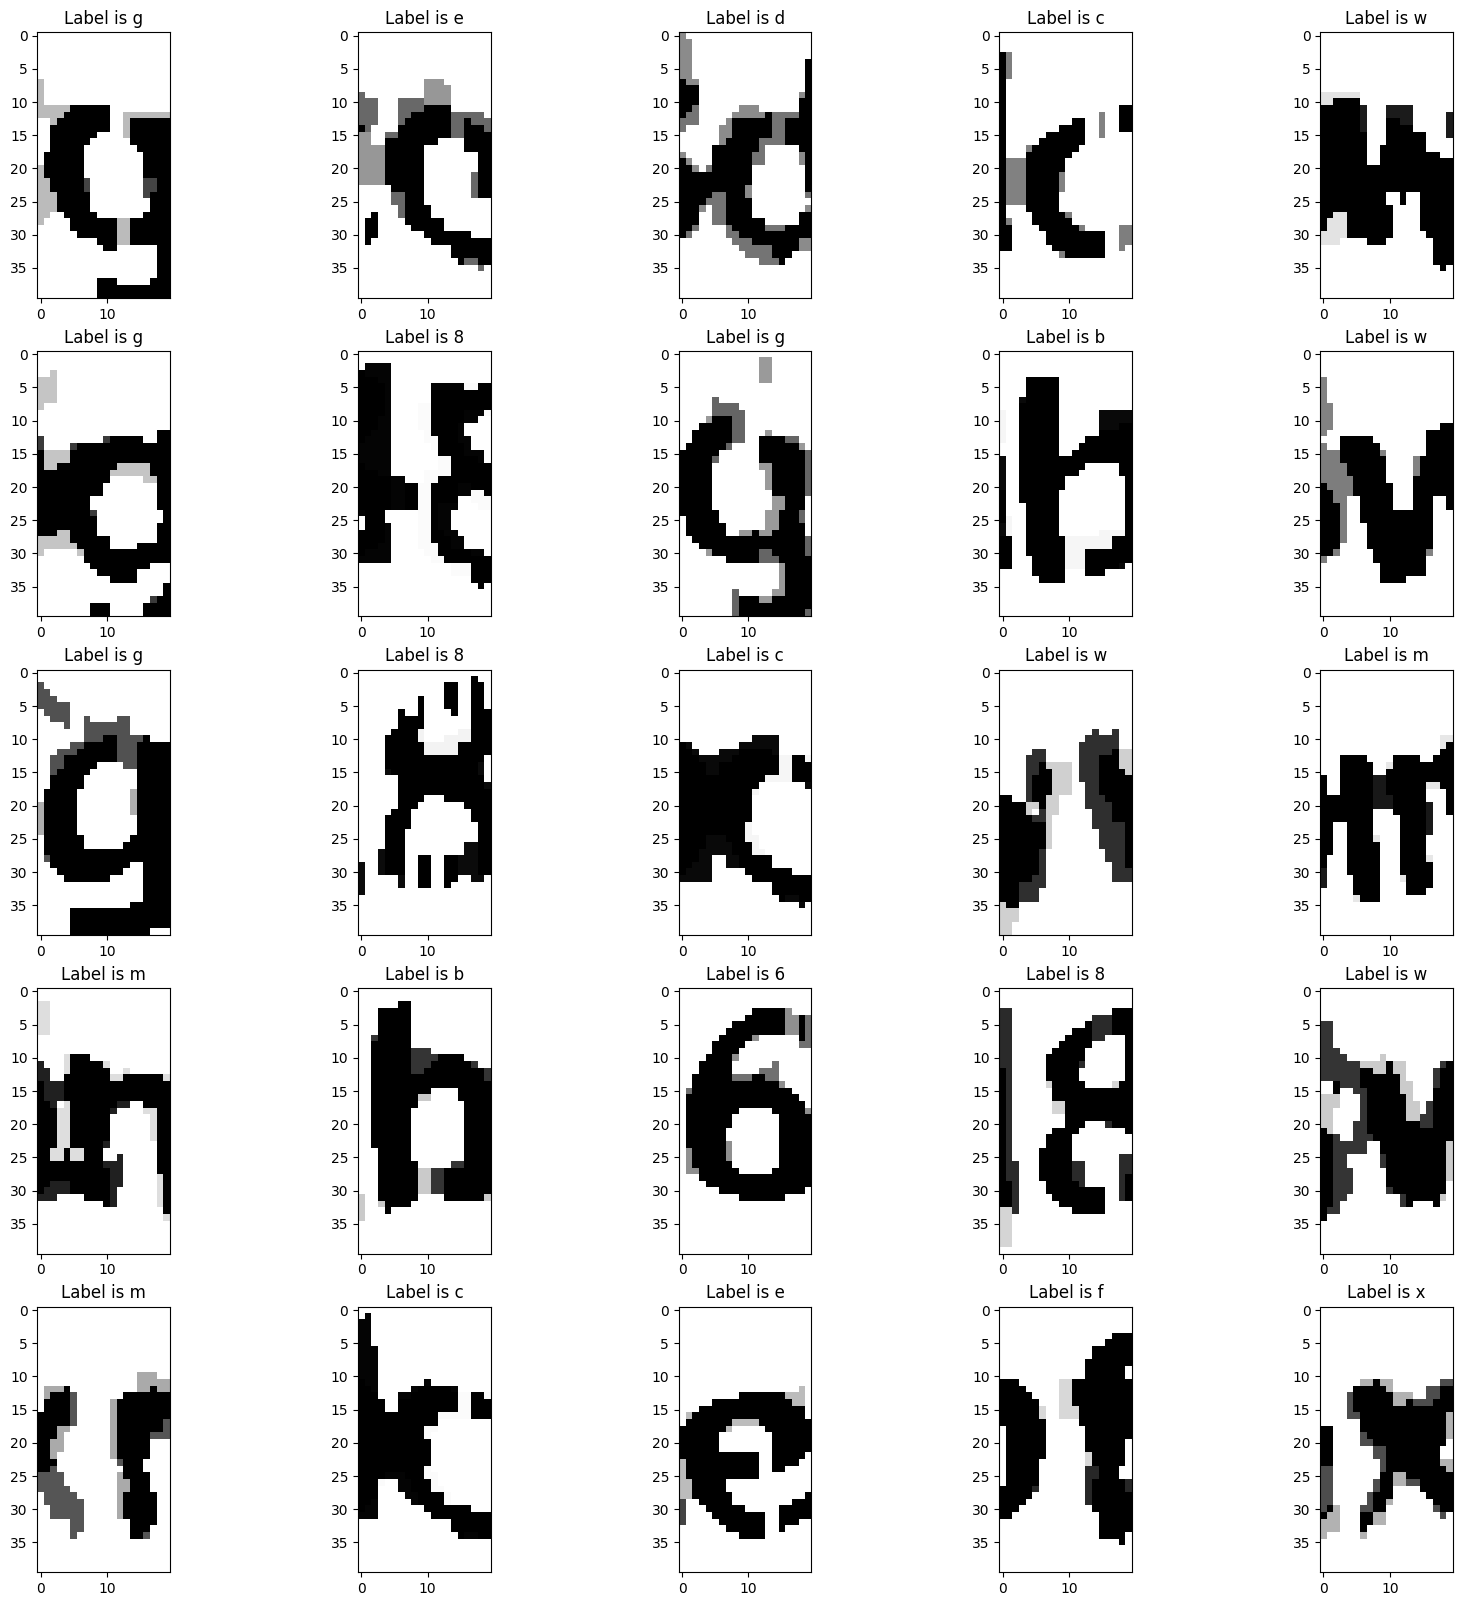

In [66]:
plt.figure(figsize = (20,20))

hi = 7800
lo = 5000

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(X_train[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(y_train[x])]))
plt.show()

In [67]:
traingen = ImageDataGenerator(rotation_range = 5, width_shift_range = [-2,2])
traingen.fit(X_train)

In [68]:
train_set = traingen.flow(X_train, y_train)

In [69]:
trainX, trainy = train_set.next()

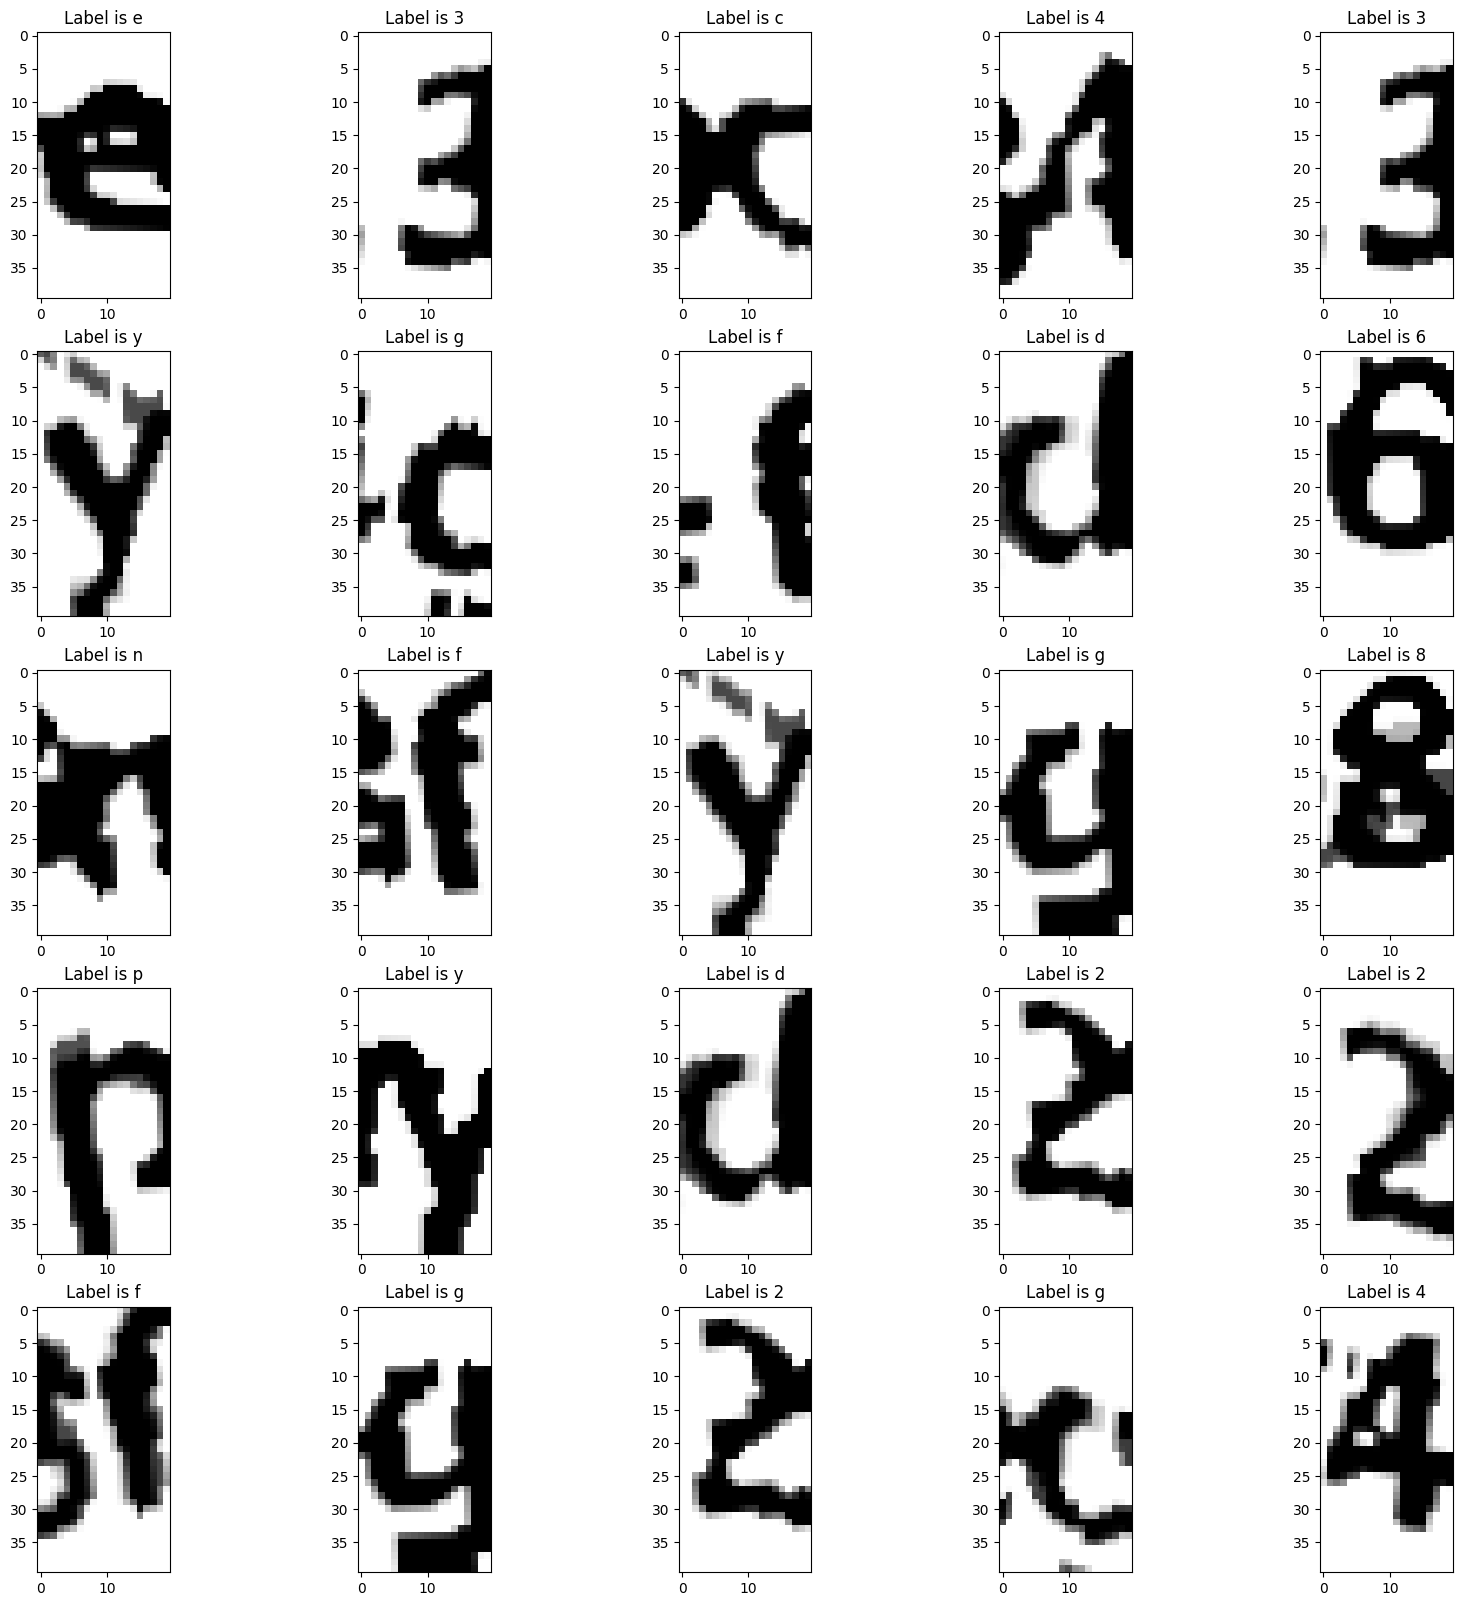

In [70]:
plt.figure(figsize = (20,20))

hi = 32
lo = 0

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(trainX[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(trainy[x])]))
plt.show()

In [71]:
model = cnn(128, 32, 16, 32, 32)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 20, 10, 128)       1792      
                                                                 
 sequential_2 (Sequential)   (None, 10, 5, 32)         37024     
                                                                 
 sequential_3 (Sequential)   (None, 5, 3, 16)          4688      
                                                                 
 flatten (Flatten)           (None, 240)               0         
                                                                 
 sequential_4 (Sequential)   (None, 32)                7840      
                                                                 
 sequential_5 (Sequential)   (None, 32)                1184      
                                                                 
 dense_2 (Dense)             (None, 19)                6

In [72]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkp = ModelCheckpoint('./result_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)

In [73]:
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)

In [74]:
print(X_train.shape)
print(y_train.shape)

(8018, 40, 20, 1)
(8018, 19)


In [75]:
history = model.fit(traingen.flow(X_train, y_train, batch_size = 32), validation_data = (X_test, y_test), epochs = 150, steps_per_epoch = len(X_train)/32, callbacks = [checkp])

Epoch 1/150
248/250 [============================>.] - ETA: 0s - loss: 2.3347 - accuracy: 0.3122
Epoch 1: val_loss improved from inf to 2.94060, saving model to ./result_model.h5
250/250 [==============================] - 20s 22ms/step - loss: 2.3296 - accuracy: 0.3134 - val_loss: 2.9406 - val_accuracy: 0.0606
Epoch 2/150
250/250 [============================>.] - ETA: 0s - loss: 1.3363 - accuracy: 0.6250
Epoch 2: val_loss improved from 2.94060 to 1.46998, saving model to ./result_model.h5
250/250 [==============================] - 4s 17ms/step - loss: 1.3358 - accuracy: 0.6253 - val_loss: 1.4700 - val_accuracy: 0.5933
Epoch 3/150
251/250 [==============================] - ETA: 0s - loss: 0.9732 - accuracy: 0.7346
Epoch 3: val_loss improved from 1.46998 to 0.68870, saving model to ./result_model.h5
250/250 [==============================] - 5s 20ms/step - loss: 0.9732 - accuracy: 0.7346 - val_loss: 0.6887 - val_accuracy: 0.8077
Epoch 4/150
250/250 [============================>.] - ETA

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

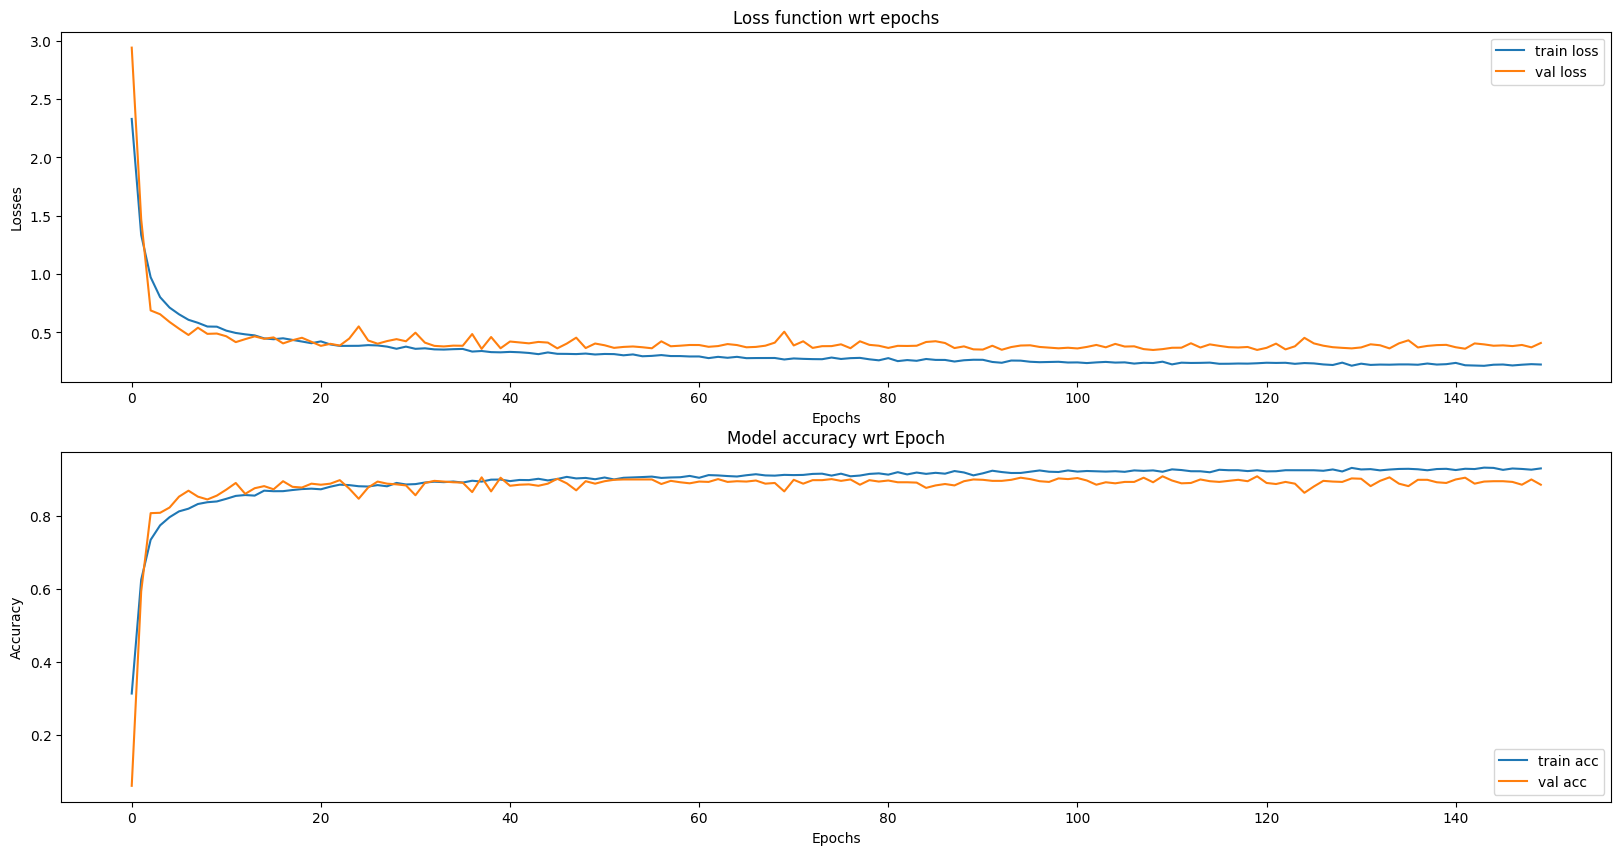

In [76]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')

In [77]:
from keras.models import load_model

In [79]:
pred = model.predict(X_test)

33/33 [==============================] - 0s 3ms/step


In [80]:
pred = np.argmax(pred, axis = 1)
yres = np.argmax(y_test,axis= 1)

In [81]:
from sklearn.metrics import accuracy_score, classification_report

In [82]:
target_name = []
for i in sorted(info) :
    target_name.append(info[i])

In [83]:
target_name

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y']

In [84]:
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names = target_name))

Accuracy : 0.885576923076923
              precision    recall  f1-score   support

           2       0.86      0.94      0.90        53
           3       1.00      0.93      0.96        56
           4       0.94      0.93      0.94        55
           5       0.98      0.97      0.97        58
           6       0.81      0.95      0.88        44
           7       1.00      0.90      0.95        59
           8       0.90      0.95      0.93        59
           b       0.97      0.95      0.96        37
           c       0.89      0.81      0.85        48
           d       0.80      0.80      0.80        41
           e       0.83      0.88      0.85        43
           f       0.91      0.97      0.94        60
           g       0.92      0.88      0.90        50
           m       0.60      0.57      0.58        53
           n       0.78      0.74      0.76       103
           p       0.98      0.91      0.95        70
           w       0.75      0.96      0.84        4

In [85]:
def get_demo (img_path) :
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))
    
    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0
    
    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)
    
    for res in ydemo :
        print(info[res])
    print(img_path[-9:])

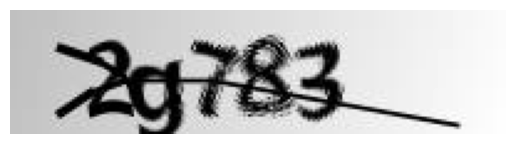

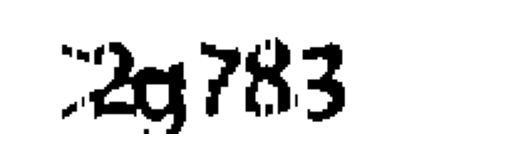

1/1 [==============================] - 0s 135ms/step
8
g
7
8
3
2g783.png


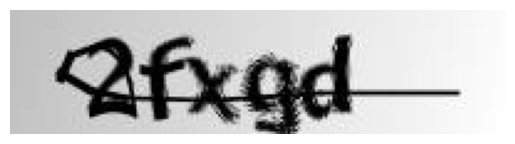

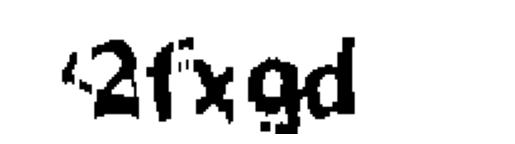

1/1 [==============================] - 0s 30ms/step
2
f
x
g
d
2fxgd.png


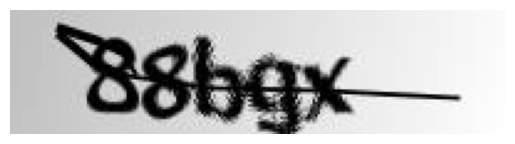

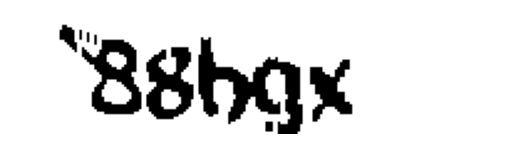

1/1 [==============================] - 0s 26ms/step
8
8
b
g
x
88bgx.png


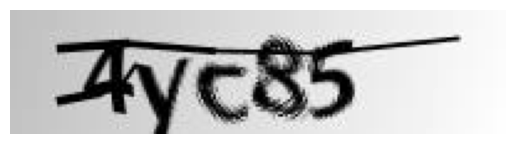

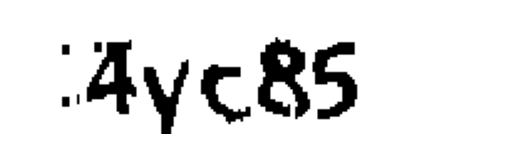

1/1 [==============================] - 0s 48ms/step
4
y
c
8
5
4yc85.png


In [86]:
get_demo('/home/samples/2g783.png')
get_demo('/home/samples/2fxgd.png')
get_demo('/home/samples/88bgx.png')
get_demo('/home/samples/4yc85.png')

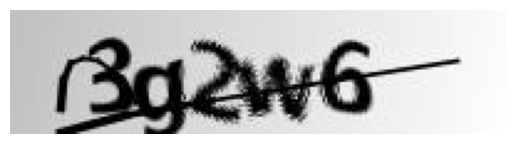

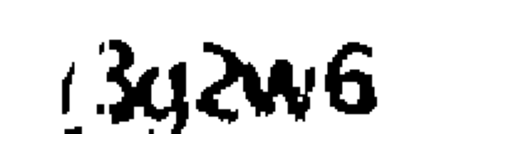

1/1 [==============================] - 0s 26ms/step
3
g
2
w
6
3g2w6.png


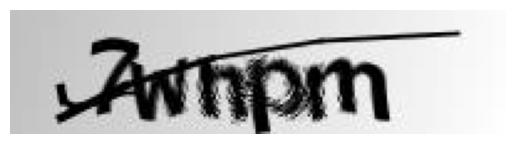

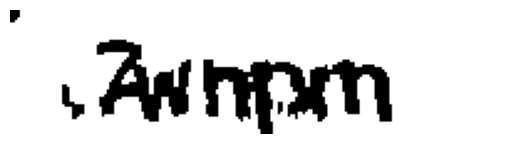

1/1 [==============================] - 0s 32ms/step
7
w
n
p
m
7wnpm.png


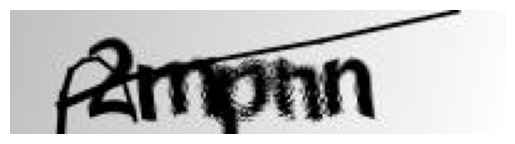

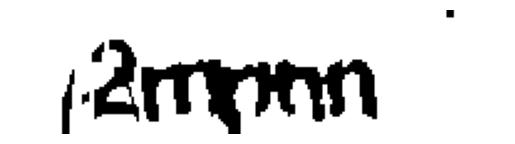

1/1 [==============================] - 0s 24ms/step
2
m
p
m
m
2mpnn.png


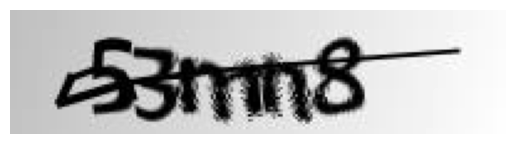

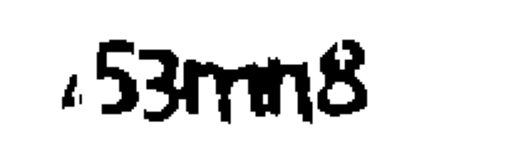

1/1 [==============================] - 0s 27ms/step
5
3
m
m
8
53mn8.png


In [87]:
get_demo('/home/samples/3g2w6.png')
get_demo('/home/samples/7wnpm.png')
get_demo('/home/samples/2mpnn.png')
get_demo('/home/samples/53mn8.png')